<a href="https://colab.research.google.com/github/AceRb6/Analitica-y-visualizacion-avanzada-de-datos/blob/main/Practica10_AVDA_CPIDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Cargar los datos
file_id = '1TRNN4R1UEL5EoQeUwV2vqw_pDtohx-n_'
url = f'https://drive.google.com/uc?id={file_id}'
hitters_data = pd.read_csv(url)

In [ ]:
display(hitters_data.head())

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [ ]:
display(hitters_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

None

In [ ]:
# Eliminar filas con valores faltantes
hitters_data = hitters_data.dropna(subset=['Salary', 'Years', 'Hits'])

Se eliminaron las filas con valores faltantes en las columnas Salary, Years, y Hits.

In [ ]:
# Transformar logarítmicamente Salary
hitters_data['log_Salary'] = np.log(hitters_data['Salary'])

<ipython-input-7-43f30fa42f43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hitters_data['log_Salary'] = np.log(hitters_data['Salary'])


Se aplicó una transformación logarítmica a la columna Salary para manejar mejor la variabilidad en los datos.

In [ ]:
# Usar más predictores: puedes ajustar esto según lo que quieras incluir
X = hitters_data[['Years', 'Hits']]
y = hitters_data['log_Salary']  # Ahora usamos el salario logaritmado

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear y entrenar el modelo de árbol de decisión
tree_model = DecisionTreeRegressor(random_state=42, min_samples_leaf=2, max_leaf_nodes=3)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=3, min_samples_leaf=2, random_state=42)

Se utilizó un modelo de árbol de decisión para predecir el salario basado en los años de experiencia (Years) y el número de hits (Hits).

El modelo se entrenó con un máximo de 3 nodos terminales y un mínimo de 2 muestras por hoja para evitar sobreajuste.

In [ ]:
# Predecir los valores de Salary
y_pred = tree_model.predict(X_test)

In [ ]:
# Calcular las métricas R^2 y MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R^2 en el conjunto de prueba: {r2:.4f}")
print(f"MSE en el conjunto de prueba: {mse:.4f}")


R^2 en el conjunto de prueba: 0.4341
MSE en el conjunto de prueba: 0.3644


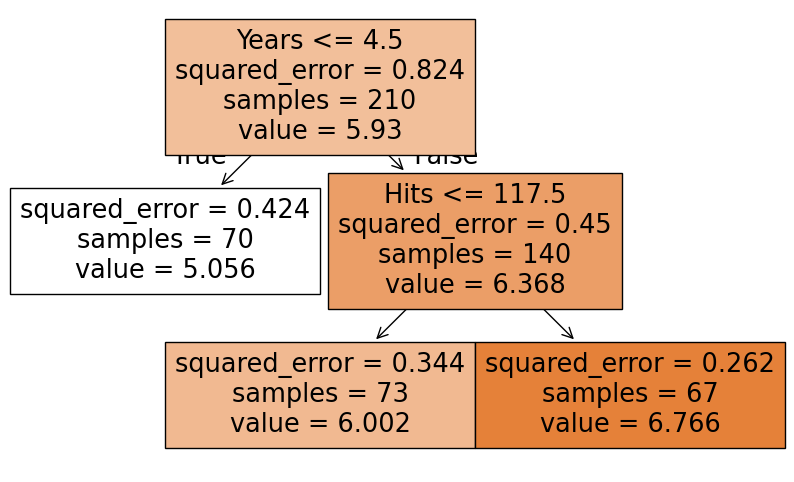

In [ ]:
#mostrar arbol
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(tree_model, filled=True, feature_names=['Years', 'Hits'])
plt.show()

$R^2$ y MSE: El valor de $R^2$ indica qué tan bien el modelo explica la variabilidad del salario. Un valor de 0.4341 sugiere que el modelo explica aproximadamente el 43.41% de la variabilidad en el salario. El MSE (Error Cuadrático Medio) es una medida de la calidad de la predicción; un valor más bajo indica un mejor ajuste del modelo a los datos.


El modelo de árbol de decisión proporciona una forma de entender cómo las variables Years y Hits influyen en el salario de los jugadores de béisbol, aunque solo explica una parte de la variabilidad total en los salarios.

In [ ]:
# Cargar los datos
file_id = '1UjhhJzh29qFar8C9akpF1QiX-5nQj5Io'
url = f'https://drive.google.com/uc?id={file_id}'
hearts_data = pd.read_csv(url)

In [ ]:
display(hearts_data.head())

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
display(hearts_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


None

In [ ]:
# Definir las variables predictoras y la variable objetivo
X = hearts_data.drop('AHD', axis=1)
y = hearts_data['AHD']

In [ ]:
# Codificar con Dummies
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Dividir datos (opcional, pero útil para evaluar después)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Obtener la ruta de poda (valores de ccp_alpha)
tree_clf = DecisionTreeClassifier(random_state=42)
path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]  # Excluimos el último valor extremo

In [ ]:
# Entrenar un árbol por cada alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

La técnica de poda basada en la complejidad de costo (ccp_alpha) ayuda a encontrar el árbol de decisión óptimo que minimiza el error de clasificación.


In [ ]:
# Validación cruzada para elegir el mejor alpha
cv_scores = []
for ccp_alpha, clf in zip(ccp_alphas, clfs):
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    cv_scores.append((ccp_alpha, scores.mean()))

La validación cruzada asegura que el modelo no solo se ajuste bien a los datos de entrenamiento, sino que también generalice bien a nuevos datos.

In [ ]:
# Convertimos a DataFrame para ver mejor
cv_df = pd.DataFrame(cv_scores, columns=['ccp_alpha', 'mean_cv_accuracy'])
best_alpha = cv_df.loc[cv_df['mean_cv_accuracy'].idxmax(), 'ccp_alpha']

In [ ]:
# Entrenar el mejor modelo con el alpha óptimo
best_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.012847340326104628),
                       random_state=42)

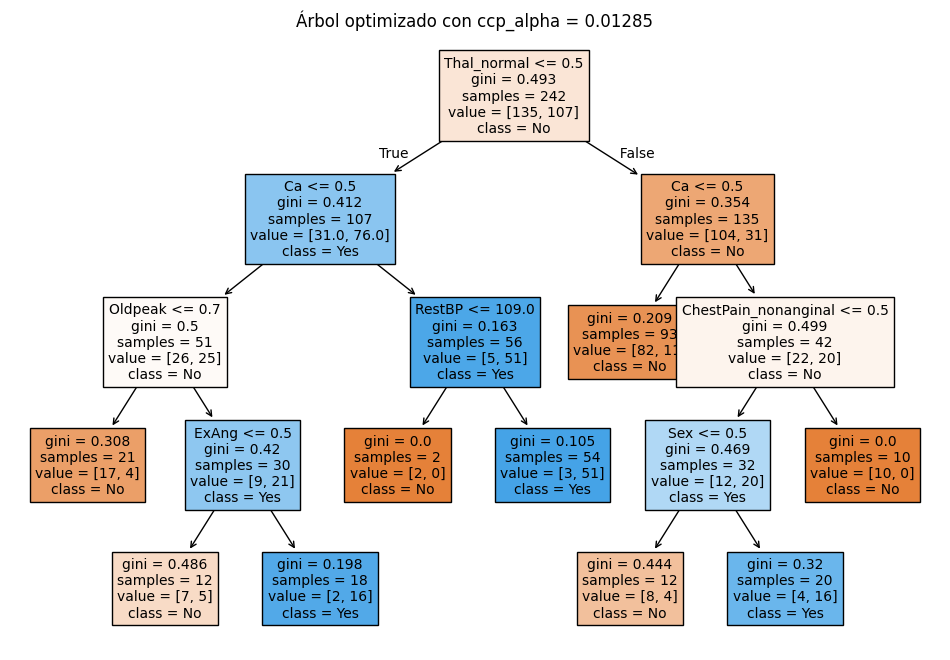

In [ ]:
# Visualizar el árbol optimizado
plt.figure(figsize=(12, 8))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], fontsize=10)
plt.title(f"Árbol optimizado con ccp_alpha = {best_alpha:.5f}")
plt.show()

In [ ]:
# Generate predictions for the classification task
y_pred = best_clf.predict(X_test)

In [ ]:
# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")

# Generar classification report
print("\nClassification Report en el conjunto de prueba:")
print(classification_report(y_test, y_pred))

Accuracy en el conjunto de prueba: 0.8197

Classification Report en el conjunto de prueba:
              precision    recall  f1-score   support

          No       0.74      0.97      0.84        29
         Yes       0.96      0.69      0.80        32

    accuracy                           0.82        61
   macro avg       0.85      0.83      0.82        61
weighted avg       0.85      0.82      0.82        61



Accuracy (Precisión): 81.97%
* El modelo predijo correctamente la presencia o ausencia de AHD en aproximadamente el 81.97% de los casos en el conjunto de prueba.

Classification Report:
* Precisión: Mide la exactitud del modelo al identificar correctamente los casos positivos.
* Recall (Sensibilidad): Mide la capacidad del modelo para identificar todos los casos relevantes.
* F1-score: Es la media armónica de precisión y recall, proporcionando una medida equilibrada de ambas.

In [ ]:
# Mostrar maximo de nodos sugeridos
print("Maximo de nodos sugeridos", best_clf.get_n_leaves())

Maximo de nodos sugeridos 9


In [ ]:
# Usar gini y CrossValidation para ver la cantidad maxima de nodos sugeridos
tree_clf = DecisionTreeClassifier(criterion='gini', random_state=42)
param_grid = {'max_leaf_nodes': range(2, 100)}
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_tree_clf = grid_search.best_estimator_

print("Mejor valor de max_leaf_nodes:", best_tree_clf.get_params()['max_leaf_nodes'])

Mejor valor de max_leaf_nodes: 7


In [ ]:
# probar con el maximo de nodos
tree_clf = DecisionTreeClassifier(criterion='gini', random_state=42, max_leaf_nodes=7)

In [ ]:
# Entrenar el modelo
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=7, random_state=42)

In [ ]:
# Predecir en el conjunto de prueba
y_pred = tree_clf.predict(X_test)

In [ ]:
# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Generar classification report
report = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy en el conjunto de prueba: {accuracy:.4f}")
print("\nClassification Report en el conjunto de prueba:")
print(report)

Accuracy en el conjunto de prueba: 0.8197

Classification Report en el conjunto de prueba:
              precision    recall  f1-score   support

          No       0.76      0.90      0.83        29
         Yes       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



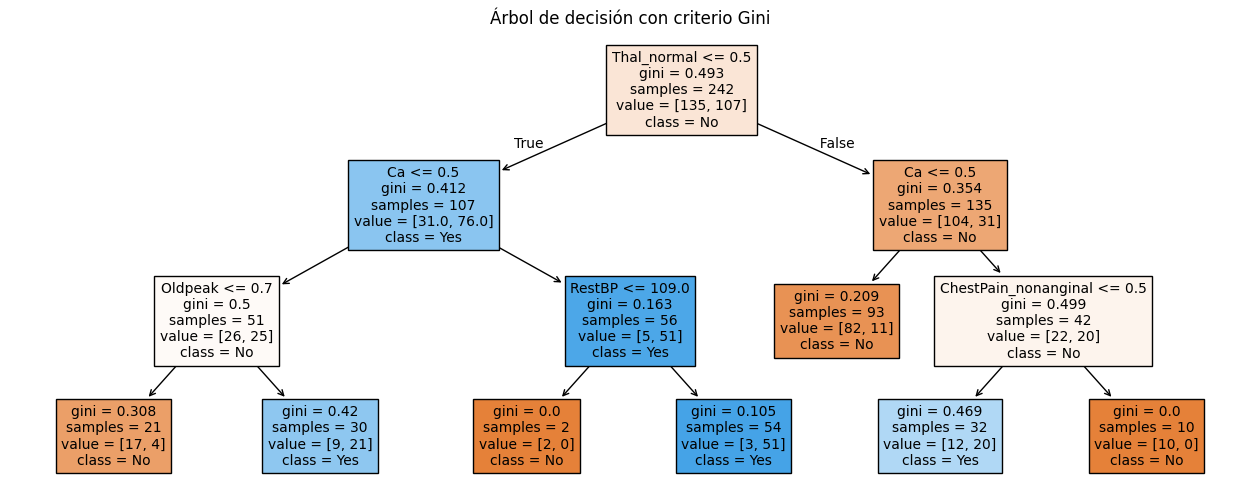

In [ ]:
# Visualizar el árbol
plt.figure(figsize=(16,6))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], fontsize=10)
plt.title("Árbol de decisión con criterio Gini")
plt.show()

Vemos que el numero de nodos de ambos solo varia por 2 entonces incluso considerando la optimizacion de los arboles optarmia mas por el de 7 nodos al ver que tiene la misma presicion.

La búsqueda de cuadrícula te permite encontrar el valor óptimo de max_leaf_nodes que maximiza la precisión del modelo.
Este enfoque es más exhaustivo y puede llevar a un modelo con mejor rendimiento en comparación con el uso exclusivo de ccp_alpha.

**Comparación de Resultados:**

Modelo Optimizado con ccp_alpha:
* Máximo de Nodos Sugeridos:

* 9 nodos terminales: El árbol optimizado con ccp_alpha sugiere un máximo de 9 nodos terminales.

* Precisión (Accuracy): El modelo predice correctamente la presencia o ausencia de AHD en aproximadamente el 81.97% de los casos en el conjunto de prueba.

* Informe de Clasificación:

 * Clase "No" (Sin AHD):
   
   Precisión: 0.74
   
   Recall: 0.97
   
   F1-score: 0.84
 * Clase "Yes" (Con AHD):
   
   Precisión: 0.96
   
   Recall: 0.69
   
   F1-score: 0.80

 * Macro y Weighted Avg:
   Ambas métricas muestran un equilibrio en el rendimiento del modelo para ambas clases.

Modelo Optimizado con Criterio Gini y max_leaf_nodes
* Mejor Valor de max_leaf_nodes:

* 7 nodos terminales: La búsqueda de cuadrícula con criterio Gini sugiere un máximo de 7 nodos terminales.

* Precisión (Accuracy): El modelo predice correctamente la presencia o ausencia de AHD en aproximadamente el 81.97% de los casos en el conjunto de prueba.

* Informe de Clasificación:

 * Clase "No" (Sin AHD):
   
   Precisión: 0.76
   
   Recall: 0.90
    
    F1-score: 0.83

 * Clase "Yes" (Con AHD):
  
   Precisión: 0.89

   Recall: 0.75

   F1-score: 0.81
* Macro y Weighted Avg:
Ambas métricas muestran un equilibrio en el rendimiento del modelo para ambas clases.


Ambos enfoques, el modelo optimizado con ccp_alpha y el modelo optimizado con criterio Gini y max_leaf_nodes, muestran una precisión similar del 81.97%. Sin embargo, hay diferencias en los informes de clasificación:

* Clase "No":

 * El modelo con ccp_alpha tiene un recall ligeramente mejor (0.97 vs 0.90).
 * El modelo con criterio Gini tiene una precisión ligeramente mejor (0.76 vs 0.74).
* Clase "Yes":

 * El modelo con ccp_alpha tiene una precisión ligeramente mejor (0.96 vs 0.89).
 * El modelo con criterio Gini tiene un recall ligeramente mejor (0.75 vs 0.69).

En general, ambos modelos tienen un rendimiento similar, pero el modelo optimizado con ccp_alpha puede ser preferible si se busca maximizar el recall para la clase "No", mientras que el modelo con criterio Gini puede ser preferible si se busca un equilibrio entre precisión y recall para ambas clases.